 ## 1. Базовая задача МНК.


**Теоретический вопрос 1.**

Пусть дана выборка точек $y_i$. Решите аналитически задачу МНК, моделируя данные постоянной величиной $\check{y}$, что отвечает минимизации функции потерь
$$
\mathcal{L}=\sum_{i=1}^l\left(y_i-\check{y}\right)^2 \rightarrow \min _{\breve{y}} .
$$

**Теоретический вопрос 2.**

Покажите, что прямая, построенная по методу МНК, всегда проходит через точку $(\bar{x}, \bar{y})$, где $\bar{x}$ и $\bar{y}$ - выборочные средние. Обобщите на случай многомерной регрессии.

**Практическое задание.**

Для четырех выборок из квартета Энскомба вычислите выборочные дисперсии $x$ и $y$ координат, а также коэффициент линейной корреляции Пирсона. Изобразите выборки на графиках. Данные можно получить в системе јuруter с помощью библиотеки seaborn, вызвав метод `load_dataset('anscombe')` .

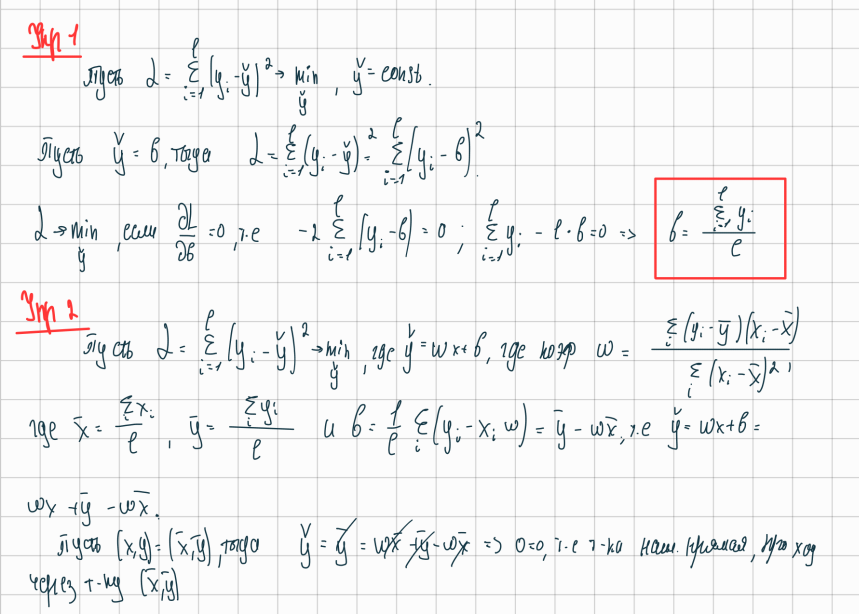

In [2]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt



In [36]:
a = sb.load_dataset("anscombe")

x = a.get("x")
y = a.get("y")
x_array = np.zeros((4,11))
y_array = np.zeros((4,11))
var_x = np.zeros(4)
var_y = np.zeros(4)
r = np.zeros(4)
cov_xy = np.zeros(4)
x_array[0] = x[0:11]
x_array[1] = x[11:22]
x_array[2] = x[22:33]
x_array[3] = x[33:44]

y_array[0] = y[0:11]
y_array[1] = y[11:22]
y_array[2] = y[22:33]
y_array[3] = y[33:44]

for i in range(4):
    print("\nДля ", i, " выборки: ")
    var_x[i] = np.var(x_array[i])
    var_y[i] = np.var(y_array[i])
    print(var_x[i], var_y[i])
    cov_xy[i] = np.cov(x_array[i],y_array[i], bias = True)[0,1]
    r[i] = cov_xy[i]/np.sqrt(var_x[i]*var_y[i])
    print(r[i])
#var_x = np.mean((x - np.mean(x))**2)
#var_y = np.mean((y - np.mean(y))**2)
#cov_x_y = np.mean((x - np.mean(x))*(y - np.mean(y)))



Для  0  выборки: 
10.0 3.7520628099173554
0.8164205163448399

Для  1  выборки: 
10.0 3.752390082644628
0.816236506000243

Для  2  выборки: 
10.0 3.747836363636364
0.8162867394895984

Для  3  выборки: 
10.0 3.7484082644628103
0.8165214368885028


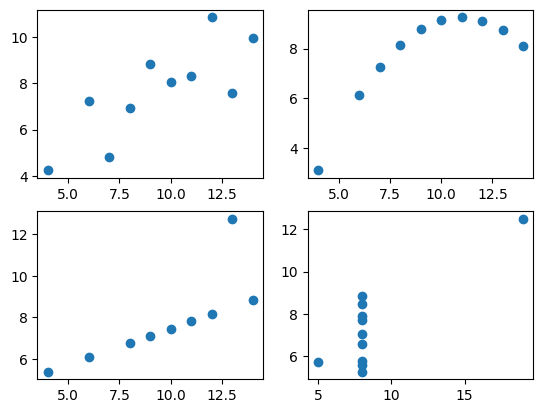

In [23]:
f, axs = plt.subplots(2, 2)

axs[0, 0].scatter(x[0:10],y[0:10])
axs[0 ,1].scatter(x[11:21],y[11:21])
axs[1, 0].scatter(x[22:31],y[22:31])
axs[1, 1].scatter(x[32:43],y[32:43])
plt.show()

## 2. Централизация признаков и МНК.

Покажите, что следующие две процедуры приводят к одинаковому результату:
1. В матрице объект-признак $X$ из каждого столбца вычитается среднее по столбцу (централизация признаков). После этого вычисляется $\left(X^T X\right)^{-1}$.
2. К матрице $X$ дописывается в конец столбец, состоящий из одних единиц. Вычисляется $\left(X^T X\right)^{-1}$ и в получившейся матрице вычеркивается последний столбец и последняя строка.


Также проверьте это практически для случайно сгенерированных матриц.

In [22]:
#n = int(input())
#m = int(input())
n = m = 5
X = -5.0 + np.random.randint(10, size = (n,m))
print(X[ ][:])
print(X)
# 1
for j in range(m):
    X[:][j]-=np.mean(X[:][j])

[[-1. -4. -3. -4.  1.]
 [ 0. -3.  2. -1. -4.]
 [-3. -5. -1. -2. -4.]
 [ 4.  4. -3. -2.  2.]
 [ 4.  4. -5. -1. -4.]]
[[-1. -4. -3. -4.  1.]
 [ 0. -3.  2. -1. -4.]
 [-3. -5. -1. -2. -4.]
 [ 4.  4. -3. -2.  2.]
 [ 4.  4. -5. -1. -4.]]


In [18]:
print(X)

[[-0.4 -3.4  2.6 -2.4  3.6]
 [-3.   1.   1.  -3.   4. ]
 [ 2.4  1.4 -1.6 -3.6  1.4]
 [-0.4 -2.4 -2.4  1.6  3.6]
 [-1.  -3.   3.   3.  -2. ]]


## 4. Матрица объект-признак.

**Теоретический вопрос 1.**

Пусть $X$ - матрица объект-признак (размерность $l \times F$ ), для которой сингулярное разложение имеет вид $X=$ $V \sqrt{\Lambda} U^T$. После понижения размерности данных с помощью метода главных компонент, в диагональной матрице $\Lambda=\operatorname{diag}\left\{\lambda_1 \geq \cdots \geq \lambda_F\right\}$ оставляются только $\tilde{F}$ наибольших сингулярных чисел: $\tilde{\Lambda}=\operatorname{diag}\left\{\lambda_1 \geq \cdots \geq \lambda_{\tilde{F}}\right\}$. При этом данные, как правило, можно восстановить только с некоторой ошибкой: $\tilde{X}=V \sqrt{\tilde{\Lambda}} U^T \neq X$. Покажите, что $L_2$ норма ошибки выражается через сумму по оставшимся сингулярным числам:
$$
\frac{1}{l}\|X-\tilde{X}\|^2=\sum_{i=\tilde{F}+1}^F \lambda_i
$$

**Теоретический вопрос 2.**

Покажите, что сингулярный вектор матрицы $X$, отвечающий наибольшему сингулярному числу, является решением задачи

$$
\boldsymbol{u}=\operatorname{argmax}_{|| \boldsymbol{u} \|=1}(X \boldsymbol{u})^2,
$$

где подразумевается матричное умножение $X$ на $\boldsymbol{u}$.


**Практическое задание.**

Сгенерируйте случайную симметричную матрицу $A$ размера $3 \times 3$. Сгенерируйте $N$ элементов из нормального распределения $P \propto e^{-\boldsymbol{x}^T} A \boldsymbol{x}$ (получится матрица объект-признак $X$ размерности $N \times 3$ ). Визуализируйте полученное облако точек (для построения интерактивных трехмерных графиков можно воспользоваться пакетом ipyml в системе jupyter). Примените к матрице $X$ метод главных компонент, визуализируйте сингулярные вектора вместе с облаком точек, а также двумерные проекции элементов выборки на плоскости, задаваемые сингулярными векторами.


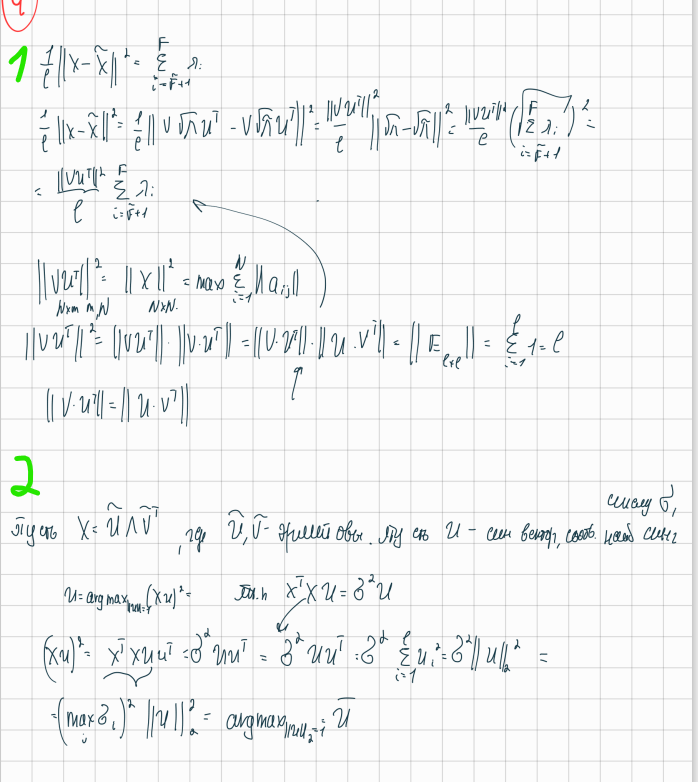

In [18]:
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import matplotlib.pyplot as plt

In [58]:
A = -5 + np.random.randint(10, size = (3,3))
count = 10
N = np.random.normal(loc=0.0, scale=1/np.sqrt(2), size = count)
print(N)
print(A)

[ 0.1712378   0.18608402  1.86451097 -2.04471878  0.27383     0.51717899
 -1.1116874  -0.02943966  0.32343169 -0.02315963]
[[ 2  2  3]
 [-5  1 -1]
 [ 3 -3 -4]]


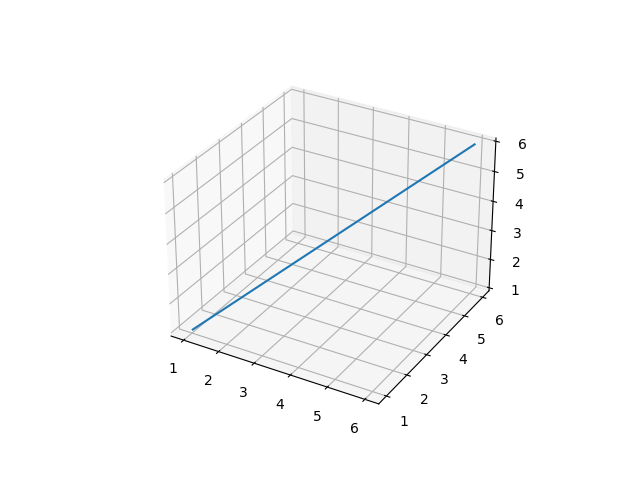

In [19]:





fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X = np.array([1,2,3,4,5,6])
Y = np.array([1,2,3,4,5,6])
Z = np.array([[1,2,3,4,5,6]])

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z)

plt.show()